In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Load dataset
data = pd.read_csv('../data/Fish.csv')

# Feature selection and preprocessing
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = data['Weight']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model using RandomForestRegressor with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and best model
best_model = grid_search.best_estimator_

# Save the model and scaler using joblib
model_path = 'model.joblib'
scaler_path = 'scaler.joblib'

joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Accuracy (R^2): {best_model.score(X_test, y_test)}")
print(f"Model MSE: {mse}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Model Accuracy (R^2): 0.9675368059412628
Model MSE: 4617.541571331421


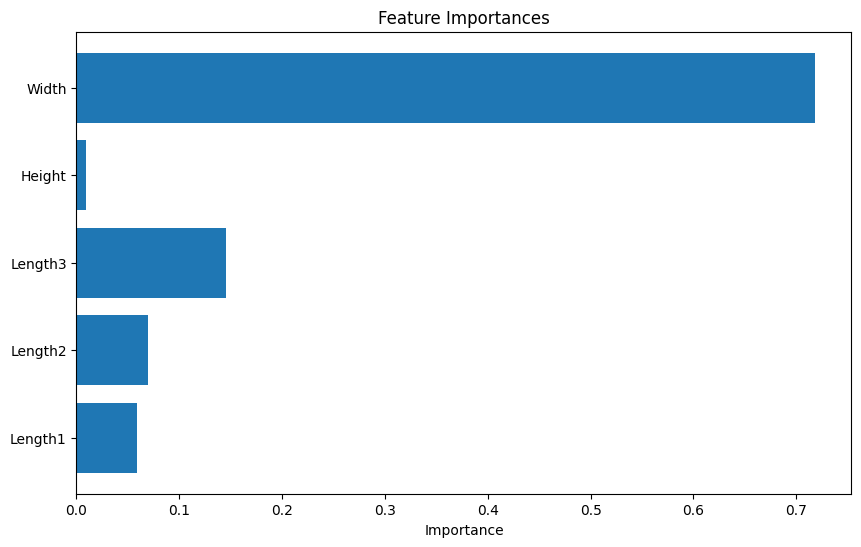

In [2]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = best_model.feature_importances_
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
